# Would you have survived Titanic?

The following project explores the data from Titanic's passengers to analyse wether those who survived have something in common and if a certain group of those passengeres were more prone to survive.

## Data set

The data used in this analysis can be found [here](https://www.kaggle.com/c/titanic/data).

This analysis is only superficial and it's conclusions are not definitive.


### Data manipulation

Before starting the analysis we will check if the data needs to be adjusted in any form.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.shape

(891, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
df.duplicated().sum()

0

In [20]:
df['Age'].isna().sum()

177

From a first look at the data we can see that the PassengerId column is not needed for our analysis. The Cabin column is also of little importance, since for most passengers, each value would be unique, we also have a lot of missing values for the Cabin column. So we are removing both Cabin and PassengerId from our data. 

The column Embarked has some missing values that can't be used, so we are also removing those lines. As of age, we could use the mean of all passenger's age to replace the missing values, but that could distort our analysis, so we are also removing the lines with missing values, even though it represents a significantly portion of our data.

In [21]:
df.drop(columns=['PassengerId', 'Cabin'], inplace=True)

In [22]:
df.dropna(inplace=True)

In [23]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [25]:
df['Ticket'].nunique()

541

The Ticket column is mostly unique for each passenger, so it is not really relevant for our analysis, so we are also removing this column for a better cleanness of our data.

In [26]:
df.drop(columns=['Ticket'], inplace=True)

In [27]:
df.nunique()

Survived      2
Pclass        3
Name        712
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

The Name column is also of no importance to our analysis, so we will also remove it. Age and Fare are both important to our analysis but they have a lot of different values, so we will classify the data into age groups and fare groups.

In [28]:
df.drop(columns=['Name'], inplace=True)

In [29]:
df['Age'].max()

80.0

In [30]:
df['Age'].min()

0.42

In [31]:
df['Fare'].max()

512.3292

In [32]:
df['Fare'].min()

0.0

Our age group will be classified as follows:
   * 0 - 4: Infant
   * 5 - 12: Child
   * 13 - 16: Teenager
   * 17 - 24: Young Adult
   * 25 - 40: Adult
   * 41 - 55: Middle Age
   * 56 - 65: Senior
   * 66 + : Elder

For our fare groups, first we will see how they are related to the Pclass column.

In [33]:
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.652174,38.105543,0.456522,0.413043,88.048121
2,0.479769,29.877630,0.427746,0.404624,21.471556
3,0.239437,25.140620,0.585915,0.456338,13.229435


In [35]:
df.groupby('Pclass').max()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,
1,1,male,80.0,3,4,512.3292,S
2,1,male,70.0,3,3,73.5000,S
3,1,male,74.0,5,6,56.4958,S


In [36]:
df.groupby('Pclass').min()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,
1,0,female,0.92,0,0,0.0,C
2,0,female,0.67,0,0,10.5,C
3,0,female,0.42,0,0,0.0,C


It seems that passengers from upper class tend to pay greater fares than those from middle and lower classes, but some passengers of the lower classes actually paid greater fares than the mean of those from middle class.

With that in mind, we will classify our fare groups as following:
   * 0.0 : No fare charged
   * 0.0 < x =< 13.0 : Bellow lower class average
   * 13.0 < x =< 21.5 : Bellow middle class average
   * 21.5 < x =< 88.0 : Below upper class average
   * 88 < x : Above upper class average

In [37]:
def sort_age(row):
    if row['Age'] >= 0 and row['Age'] < 5:
        return 'Infant'
    elif row ['Age'] >= 5 and row['Age'] < 13:
        return 'Child'
    elif row['Age'] >= 13 and row['Age'] < 17:
        return 'Teenager'
    elif row['Age'] >= 17 and row['Age'] < 25:
        return 'Young Adult'
    elif row ['Age'] >= 25 and row['Age'] < 41:
        return 'Adult'
    elif row ['Age'] >= 41 and row['Age'] < 56:
        return 'Middle Age'
    elif row ['Age'] >= 56 and row['Age'] < 65:
        return 'Senior'
    else:
        return 'Elder'
    
df['Age_group'] = df.apply(sort_age, axis=1)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,male,22.0,1,0,7.2500,S,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult


In [39]:
def sort_fare(row):
    if row['Fare'] == 0.0:
        return 'No fare charged'
    elif row['Fare'] > 0 and row['Fare'] <= 13.0:
        return 'Bellow lower class average'
    elif row['Fare'] > 13.0 and row['Fare'] <= 21.5:
        return 'Below middle class average'
    elif row['Fare'] > 21.5 and row['Fare'] <= 88.0:
        return 'Bellow upper class average'
    else:
        return 'Above upper class average'

df['Fare_group'] = df.apply(sort_fare, axis=1)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,Fare_group
0,0,3,male,22.0,1,0,7.2500,S,Young Adult,Bellow lower class average
1,1,1,female,38.0,1,0,71.2833,C,Adult,Bellow upper class average
2,1,3,female,26.0,0,0,7.9250,S,Adult,Bellow lower class average
3,1,1,female,35.0,1,0,53.1000,S,Adult,Bellow upper class average
4,0,3,male,35.0,0,0,8.0500,S,Adult,Bellow lower class average


Now that both age and fare are classified into groups, we don't need the Age and Fare columns anymore, so we can remove them from our data.

In [41]:
df.drop(columns=['Age', 'Fare'], inplace=True)

In [42]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_group,Fare_group
0,0,3,male,1,0,S,Young Adult,Bellow lower class average
1,1,1,female,1,0,C,Adult,Bellow upper class average
2,1,3,female,0,0,S,Adult,Bellow lower class average
3,1,1,female,1,0,S,Adult,Bellow upper class average
4,0,3,male,0,0,S,Adult,Bellow lower class average


This concludes our data manipulations and we can now start our analysis.

### Data analysis

In this section we will check whether the survival of the passenger is related in someway to any other characteristics of the passengers. Then we will answer the following questions:
   * Did the passenger's sex influenced in it's chance of survival?
   * Had socio-economic status a role in the passenger's chance of survival?
   * Were passengers of a certain age group more prone to survive?
   * Paying more for the ticket gave the passenger a better chance to survive?
   * Had solo traveler's better chance to survive?
   * Did passengers who boarded from a certain city had better chances to survive?
    
Answering those questions will give us a profile of the passenger who had the greatest chance of survival.

To answer those questions we will be analysing graphics formed by relating the variables and by grouping the passengers.

In [43]:
df.groupby('Sex')['Survived'].sum()

Sex
female    195
male       93
Name: Survived, dtype: int64

In [44]:
df.groupby('Pclass')['Survived'].sum()

Pclass
1    120
2     83
3     85
Name: Survived, dtype: int64

In [45]:
df.groupby('Age_group')['Survived'].sum()

Age_group
Adult          116
Child           13
Elder            1
Infant          27
Middle Age      43
Senior          10
Teenager        15
Young Adult     63
Name: Survived, dtype: int64

In [46]:
df.groupby('Embarked')['Survived'].sum()

Embarked
C     79
Q      8
S    201
Name: Survived, dtype: int64

In [48]:
df.groupby('SibSp')['Survived'].sum()

SibSp
0    173
1     97
2     11
3      4
4      3
5      0
Name: Survived, dtype: int64

In [49]:
df.groupby('Parch')["Survived"].sum()

Parch
0    184
1     61
2     39
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [50]:
df.groupby('Fare_group')['Survived'].sum()

Fare_group
Above upper class average      44
Bellow lower class average     83
Bellow upper class average    125
Below middle class average     35
No fare charged                 1
Name: Survived, dtype: int64

From this preliminary analisys we can see that:
   * More women survived than men
   * More passengers from upper class survived
   * More adults survived
   * More passengers that boarded from Southampton survived
   * More solo passengers survived
  
    
But we can not yet jump to any conclusions, some of those factors may have influence over others.

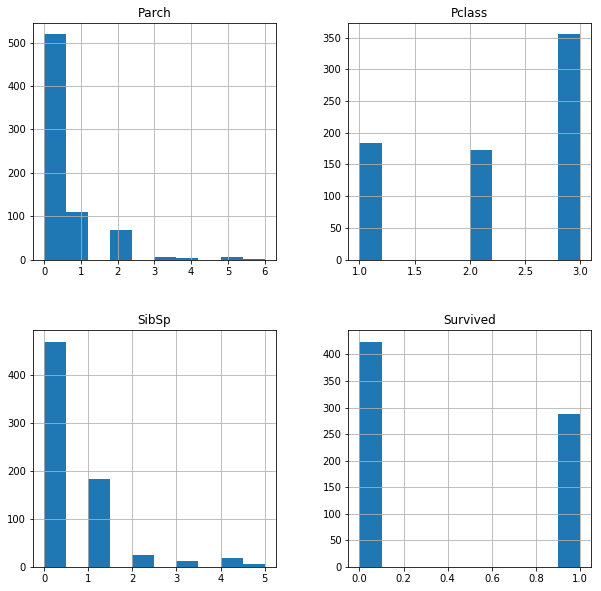

In [56]:
df.hist(figsize=(10,10));

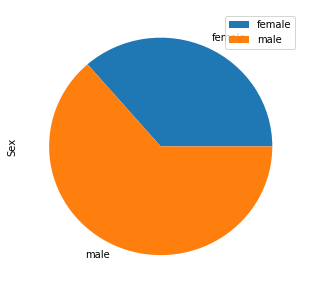

In [95]:
df.groupby('Sex')['Sex'].count().plot(kind='pie', legend=True, figsize=(5,5));

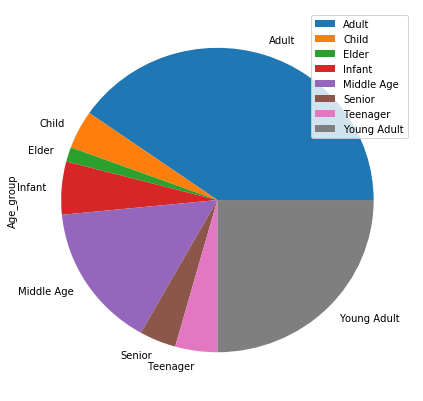

In [96]:
df.groupby('Age_group')['Age_group'].count().plot(kind='pie', legend=True, figsize=(7,7));

Here we can see that solo travelers were the majority amongst all passengers so naturally there were more survivors that were travelling alone, so we can't draw any conclusions from this data. On the other hand we can see that socio-economic status had a big influnce on the survival rate because even thouht the majority of the passengers were from the lower class, relatively they had the worst survival rate.

Another factor of greater impact was the sex of the passengers, most of the passengers that boarded Titanic were males, but female passengers had more than twice the survival rate of the male passengers.

Regarding the age group, we can also see that the proportion between passengers of a certain age group that boarded Titanic are similar to the proportion of the passengers of the same age group that survived. This means that with this data we can't draw any conclusion to say if any age group had better chances of survival.

Now that we know that socio-economic status and sex had a significant impact on the survival rate, we can compare other data to them.

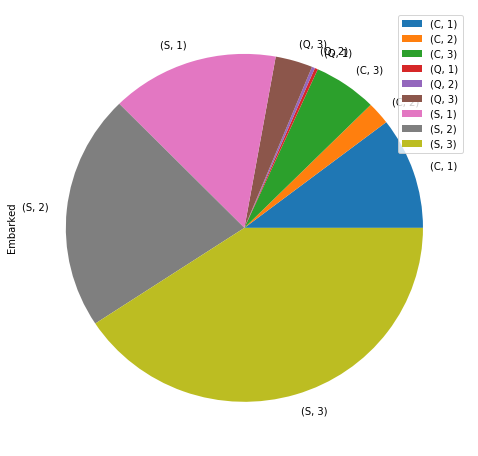

In [98]:
df.groupby(['Embarked', 'Pclass'])['Embarked'].count().plot(kind='pie', legend=True, figsize=(8,8));

One factor that at first seemed quite significant about the survival rate was in which city the passenger boarded. But in the pie chart above we can see that the proportion of passengers that boarded from a city follows the same proportion of those from the same city who survived. Besides, this also show us that in two of three cities, there were more passengers from lower classes boarding, but the one's from upper classes had better survival rates.

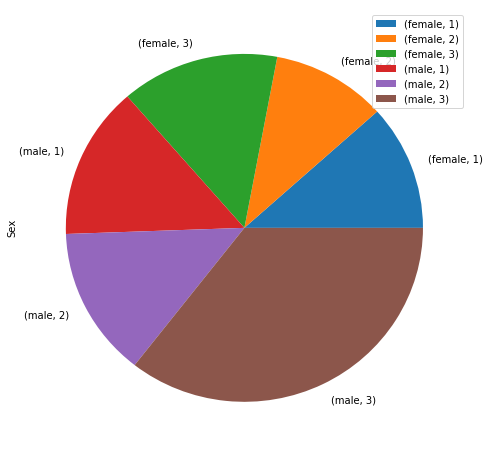

In [97]:
df.groupby(['Sex', 'Pclass'])['Sex'].count().plot(kind='pie', legend=True, figsize=(8,8));

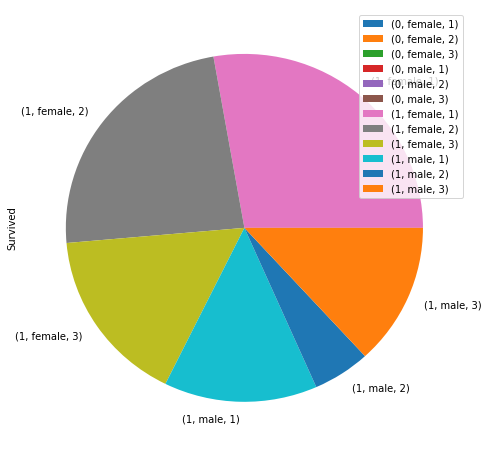

In [100]:
df.groupby(['Survived', 'Sex', 'Pclass'])['Survived'].sum().plot(kind='pie', legend=True, figsize=(8,8));

In the graphs above, we compare the two most relevant factors: sex and socio-economic status. The proportion of men and women on the upper and middle classes are well balanced, but the lower classes had nearly twice more men than women.

The first graph also show that the lower classes had more men than the upper and middle classes combined and the number of women on the lower classes was almost the same of those in the upper classes.

Looking at the second graph we see that the number of male survivors from the upper and middle classes combined are greater than the number of male survivors from the lower classes. For the women, the great majority that survived were also the ones from upper and middle classes. 

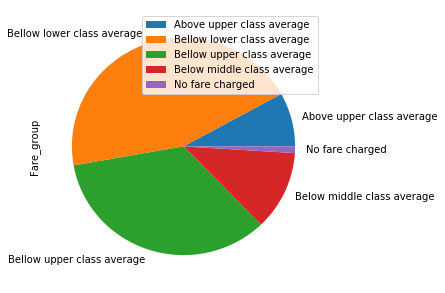

In [101]:
df.groupby('Fare_group')['Fare_group'].count().plot(kind='pie', legend=True, figsize=(5,5));

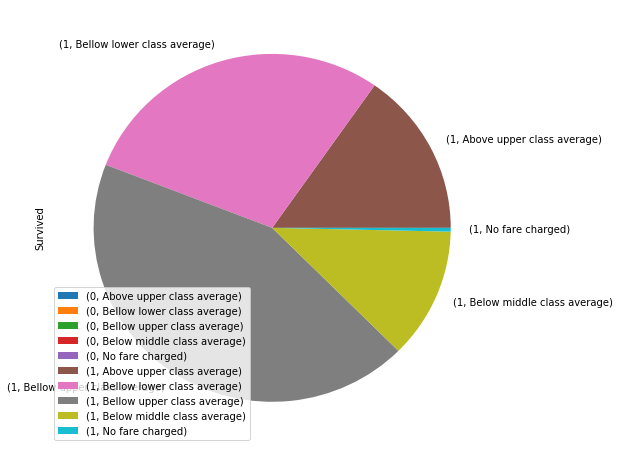

In [103]:
df.groupby(['Survived', 'Fare_group'])['Survived'].sum().plot(kind='pie', legend=True, figsize=(8,8));

On the two pie charts above we can also see that the slice of the survivors that paid more also increases compared two the slices of the passengers that bought the cheapest tickets.

### Conclusions

To the answer of our questions what we can say is:
   * Did the passenger's sex influenced in it's chance of survival?
   * _Yes, female passengers in all classes survived more than males_
   * Had socio-economic status a role in the passenger's chance of survival?
   * *Yes, despite being the majority, the lower classes had the most casualties*
   * Were passengers of a certain age group more prone to survive?
   * *Inconclusive, the proportion of passengers who surived from each age group, follow the proportions of the passengers that boarded from the same age group*
   * Paying more for the ticket gave the passenger a better chance to survive?
   * *Yes, passengers the proportion of survivors that paid more for a ticket are greater than the proportion of passengers that paid more that boarded the ship*
   * Had solo traveler's better chance to survive?
   * *Inconclusive, the proportion of solo passengers who surived, follow the proportions of solo passengers that boarded*
   * Did passengers who boarded from a certain city had better chances to survive?
   * *Inconclusive, the proportion of survivors that boarded from a certain city follows the proportion of passengers that boarded from the same cities*
       
It seems that the most relevant factor for surival was the socio-economic status, pherhaps the cabins nearer the deck were more expensive and passengers staying there could reach the emergency boats faster or it was indeed a criteria used to select who would board the boats first.

The second most relevant factor was the sex, it is known that women and children had a priority to board the emergency boats.

This analysis is only preliminary and could not draw any conclusions on other factors, but a further investigation with statistics could give better conclusions.

Thanks for reading.

### List of third partie content:
N/A